In [ ]:
!pip install pymatgen

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 23.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.4/561.4 kB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 39.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 39.2 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.11.4
    Uninstalling scipy-1.11.4:
    

In [ ]:
import numpy as np


def read_xyz_md(name):
    """
    Read xyz file:
        first line number of atoms
        second line: first 9 column is 3 unit cell vector, the last column is energy
    :param name:
    :return: a list of cell vectors, coords, atoms, and energies
    """
    f = open(name)

    i = 1  #line index
    m = 0  #frame index

    cells = []
    coords = []
    atoms = []
    energies = []

    atom = []
    cell = []
    coord = []

    nAtom = int(f.readline().split()[0])
    for line in f.readlines():
        line = line.split()

        if (m + 1 < i) and (i < m + nAtom + 2):
            atom.append(line[0])
            coord.append([float(line[1]), float(line[2]), float(line[3])])

        if i == m + 1:
            cell = np.array([float(x) for x in line[:-1]]).reshape(3, 3)
            if len(line) == 10:
                energies.append(float(line[-1]))
            else:
                energies.append(0.0)

        if len(line) == 1 and line[0] == str(nAtom):  # start new frame
            if len(cell) > 1:
                cells.append(cell)
                coords.append(coord)
                atoms.append(atom)
            atom = []
            cell = []
            coord = []
            m = i  # increase one frame
        i += 1
    f.close()
    cells.append(cell)
    coords.append(coord)
    atoms.append(atom)
    return cells, coords, atoms, energies


def read_xyz_force(name):
    """
    Read xyz file:
        first line number of atoms
        second line: first 9 column is 3 unit cell vector, the last column is energy
    :param name:
    :return: a list of cell vectors, coords, atoms, forces, and energies
    """
    f = open(name)

    i = 1  # line index
    m = 0  # frame index

    cells = []
    coords = []
    atoms = []
    energies = []
    forces = []

    atom = []
    cell = []
    coord = []
    force = []

    nAtom = int(f.readline().split()[0])
    for line in f.readlines():
        line = line.split()

        if (m + 1 < i) and (i < m + nAtom + 2):
            atom.append(line[0])
            coord.append([float(line[1]), float(line[2]), float(line[3])])
            force.append([float(force_atom) for force_atom in line[4:7]])

        if i == m + 1:
            cell = np.array([float(x) for x in line[:-1]]).reshape(3, 3)
            energies.append(float(line[-1]))

        if len(line) == 1 and line[0] == str(nAtom):  # start new frame
            if len(cell) > 1:
                cells.append(cell)
                coords.append(coord)
                atoms.append(atom)
                forces.append(force)
            atom = []
            cell = []
            coord = []
            force = []
            m = i  # increase one frame
        i += 1
    f.close()
    cells.append(cell)
    coords.append(coord)
    atoms.append(atom)
    forces.append(force)
    return cells, coords, atoms, forces, energies


def read_descriptor_xyz(name):  #Name is file name
    """
    Read xyz like file descriptors:
        first line number of atoms
        second line: first 9 column is 3 unit cell vector, the last column is energy
    :param name:
    :return: a list of cell vectors, coords, atoms, and energies
    """
    f = open(name)

    i = 1  # line index
    m = 0  # frame index

    cells = []
    coords = []
    atoms = []
    energies = []
    descriptors = []

    atom = []
    cell = []
    coord = []
    descriptor =[]
    nAtom = int(f.readline().split()[0])
    for line in f.readlines():
        line = line.split()

        if (m + 1 < i) and (i < m + nAtom + 2):
            atom.append(line[0])
            descriptor.append([float(x) for x in line[1: -3]])
            coord.append([float(line[-3]), float(line[-2]), float(line[-1])])

        if i == m + 1:
            cell = np.array([float(x) for x in line[:-1]]).reshape(3, 3)
            energies.append(float(line[-1]))

        if len(line) == 1 and line[0] == str(nAtom):  # start new frame
            if len(cell) > 1:
                cells.append(cell)
                coords.append(coord)
                atoms.append(atom)
                descriptors.append(descriptor)
            atom = []
            cell = []
            coord = []
            descriptor = []
            m = i  # increase one frame
        i += 1
    cells.append(cell)
    coords.append(coord)
    atoms.append(atom)
    descriptors.append(descriptor)
    f.close()
    return cells, coords, atoms, energies, descriptors


def read_xyz_spin(name):
    """
    Read xyz file:
        first line number of atoms
        second line: first 9 column is 3 unit cell vector, the last column is energy
    :param name:
    :return: a list of cell vectors, coords, atoms, spins, and energies
    """
    f = open(name)

    i = 1  # line index
    m = 0  # frame index

    cells = []
    coords = []
    atoms = []
    energies = []
    spins = []

    atom = []
    cell = []
    coord = []
    spin = []

    nAtom = int(f.readline().split()[0])
    for line in f.readlines():
        line = line.split()

        if (m + 1 < i) and (i < m + nAtom + 2):
            atom.append(line[0])
            coord.append([float(line[1]), float(line[2]), float(line[3])])
            spin.append(float(line[4]))

        if i == m + 1:
            cell = np.array([float(x) for x in line[:-1]]).reshape(3, 3)
            energies.append(float(line[-1]))

        if len(line) == 1 and line[0] == str(nAtom):  # start new frame
            if len(cell) > 1:
                cells.append(cell)
                coords.append(coord)
                atoms.append(atom)
                spins.append(spin)
            atom = []
            cell = []
            coord = []
            spin = []
            m = i  # increase one frame
        i += 1
    f.close()
    cells.append(cell)
    coords.append(coord)
    atoms.append(atom)
    spins.append(spin)
    return cells, coords, atoms, spins, energies


In [ ]:
from pymatgen.core import Structure, Element
from sklearn.model_selection import train_test_split
from multiprocessing import Pool
import numpy as np
from sklearn.linear_model import Ridge, LinearRegression
# from read_xyz import read_xyz_md
from matplotlib import pyplot as plt
import tensorflow
import tensorflow.keras.backend as K
import numpy as np
# from read_xyz import read_xyz_md, read_xyz_force
from sklearn.model_selection import train_test_split
from multiprocessing import Pool
# from pymatgen import Structure
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Add, Activation, Dropout, BatchNormalization, Conv1D, Conv2D, Concatenate, Dense, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.utils import Sequence
from matplotlib import pyplot as plt
import pymatgen as pm
from tensorflow.keras.layers import Multiply
from tensorflow.python.ops import math_ops
from tensorflow.python.framework import ops



cells, coords, atoms, forces, energies = read_xyz_force('/content/drive/MyDrive/Colab Notebooks/Pairwise_data/Si_64.xyz')
n_frame = len(atoms)
rc = 8.0

#p = Pool(8)
#data = p.map(descriptor, range(len(atoms)))
data = np.load('/content/drive/MyDrive/Colab Notebooks/Pairwise_data/data_force.npy', allow_pickle = True)

train_data, test_data = train_test_split(data, test_size=0.2, random_state=0)

X_train = []
y_train = []
n_train = []

for d in train_data:
    X_train += d['R']
    y_train += d['F']
    n_train += d['X']

X_train = np.array(X_train)
y_train = np.array(y_train)
n_train = np.array(n_train)

X_test = []
y_test = []
n_test = []

for d in test_data:
    X_test += d['R']
    y_test += d['F']
    n_test += d['X']

X_test = np.array(X_test)
y_test = np.array(y_test)
n_test = np.array(n_test)


print(X_train.shape, y_train.shape, n_train.shape)
print(np.max(X_train), np.min(X_train), np.max(y_train), np.min(y_train), np.max(n_train), np.min(n_train))

def pairwise_pool(x):
    return K.sum(x, axis=-2)

class Generator(Sequence):
    """Pairs for compare images
    This will create batch_size examples of positive examples and that of negative examples
    """
    def __init__(self, X, n, y, batch_size = 32, shuffle = True):
        """
        :param X: list of images
        :parm y: labels of images
        :param batch_size:
        :param shuffle:
        """
        self.X = X
        self.n = n
        self.y = y
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.indexes = np.arange(X.shape[0])
        self.on_epoch_end()

    def __len__(self):
        """Denotes the number of batches per epoch"""
        return int(np.floor(len(self.indexes) / self.batch_size))

    def __getitem__(self, index):
        """
        Generate one batch of data
        """
        # Generate indexes of the batch
        indexes = self.indexes[index * self.batch_size: (index + 1) * self.batch_size]
        X_train = self.X[indexes, :, :]
        n_train = self.n[indexes, :, :]
        y_train = self.y[indexes]
        return [X_train, n_train], y_train

    def on_epoch_end(self):
        """Updates indexes after each epoch"""
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

#train_generator = Generator(X = X_train, n = n_train, y = Y_train, batch_size = 32)
#test_generator = Generator(X = X_test, n = n_test, y = Y_test, batch_size = 32)







"""
y_pred_test = model.predict([X_test, n_test])
y_pred_train = model.predict([X_train, n_train])

plt.subplot(1,2,1)
plt.scatter(y_train, y_pred_train, s = 1)
#p = np.linspace(-30, 30, 1000)
#p2 = p
#plt.plot(p,p2)
plt.xlabel('DFT forces')
plt.ylabel('Predeicted forces')
plt.title('Train set')

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred_test, s = 1)
#plt.plot(p,p2)
plt.title('Test set')
plt.savefig('cus.png')


plt.close()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(y_test, y_pred_test, s = 0.5)
plt.xlabel('DFT forces')
plt.ylabel('Predeicted forces')
plt.title('Test set')
plt.savefig('ver1_test')


plt.close()
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.scatter(y_train, y_pred_train, s = 0.5)
plt.xlabel('DFT forces')
plt.ylabel('Predeicted forces')
plt.title('Trainning set')
plt.savefig('ver1_train')
"""



(179520, 120, 2) (179520, 3) (179520, 120, 3)
1.0 0.0 1.87937576 -1.8774496 1.0000000000000002 -1.0000000000000002


"\ny_pred_test = model.predict([X_test, n_test])\ny_pred_train = model.predict([X_train, n_train])\n\nplt.subplot(1,2,1)\nplt.scatter(y_train, y_pred_train, s = 1)\n#p = np.linspace(-30, 30, 1000)\n#p2 = p\n#plt.plot(p,p2)\nplt.xlabel('DFT forces')\nplt.ylabel('Predeicted forces')\nplt.title('Train set')\n\nplt.subplot(1,2,2)\nplt.scatter(y_test, y_pred_test, s = 1)\n#plt.plot(p,p2)\nplt.title('Test set')\nplt.savefig('cus.png')\n\n\nplt.close()\nplt.xlim([-2,2])\nplt.ylim([-2,2])\nplt.scatter(y_test, y_pred_test, s = 0.5)\nplt.xlabel('DFT forces')\nplt.ylabel('Predeicted forces')\nplt.title('Test set')\nplt.savefig('ver1_test')\n\n\nplt.close()\nplt.xlim([-2,2])\nplt.ylim([-2,2])\nplt.scatter(y_train, y_pred_train, s = 0.5)\nplt.xlabel('DFT forces')\nplt.ylabel('Predeicted forces')\nplt.title('Trainning set')\nplt.savefig('ver1_train')\n"

In [ ]:
def fc(r, rc):
    return 0.5 * (np.cos(np.pi * r / rc) + 1.0)

def descriptor(i_frame):
    atom = atoms[i_frame]
    coord = coords[i_frame]
    force = forces[i_frame]
    cell = cells[i_frame]

    struct = pm.Structure(lattice=cell, species=atom, coords=coord, coords_are_cartesian=True)
    all_neighbors = struct.get_all_neighbors(r=rc, include_index=False)

    # size = n_force x n_neighbor x 1: r_{ij}
    R = []
    # size = n_force x n_neighbor x 1: \frac{r_{i\alpha} - r_{j\alpha}}{|r_i - r_j|}
    X = []
    # force n_atom x
    F = []

    for idx, atom_ in enumerate(atom):
        neigh = all_neighbors[idx]
        center_coord = np.array(struct[idx].coords)

        r_atom = np.zeros((120, 2))
        x_atom = np.zeros((120, 3))


        for i_neighbor, neighbor_site in enumerate(neigh):
            neighbor_coord = np.array(neighbor_site[0].coords)
            r_ = neighbor_site[1]


            r_atom[i_neighbor, 0] = r_ * fc(r_, rc)
            r_atom[i_neighbor, 1] = 1.0 / r_

            x_atom[i_neighbor, 0] = (neighbor_coord[0] - center_coord[0]) / r_
            x_atom[i_neighbor, 1] = (neighbor_coord[1] - center_coord[1]) / r_
            x_atom[i_neighbor, 2] = (neighbor_coord[2] - center_coord[2]) / r_

        f_ = forces[i_frame][idx]
        f_ = np.array(f_) #* 25.711 * 0.5

        #r_atom = r_atom/np.max(r_atom)
        #r_atom = (r_atom - np.mean(r_atom)) / np.std(r_atom)
        r_atom = (r_atom - np.min(r_atom)) / (np.max(r_atom) - np.min(r_atom)) #min max scaler

        F.append(f_)
        R.append(r_atom)
        X.append(x_atom)

    return {'F': F, 'R': R, 'X': X}

In [ ]:
def rmse(y_true, y_pred):
  return K.sqrt(K.mean(K.square(y_pred - y_true)))

def inverse_r2_loss(y_true, y_pred):
  SS_res = K.sum(K.square(y_true - y_pred))
  SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
  return SS_res / (SS_tot + K.epsilon())


In [ ]:
def plot(model, X_test, n_test, X_train, n_train, y_train, y_test, name):
  y_pred_test = model.predict([X_test, n_test])
  plt.scatter(y_test, y_pred_test, s = 1)
  plt.xlabel('DFT forces', fontweight= 'bold')
  plt.ylabel('Predeicted forces', fontweight= 'bold')
  plt.title('Test set', fontweight= 'bold')

  plt.tight_layout()
  plt.savefig(f"{name}.png")
  plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 5,
    verbose=1,
    restore_best_weights=True
)

P_DROPOUT = 0.0
L2 = 0.00
sigma = 0.05

input_x = Input(shape=(120, 2))
input_n = Input(shape=(120, 3))

x_shortcut = input_x

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='relu')(input_x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2))(x)

x_shortcut = Conv1D(filters = 128, kernel_size = 1,
                kernel_regularizer = regularizers.l2(L2))(x_shortcut)
x = Concatenate(axis = -1)([x, x_shortcut])
x = Activation('relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=64, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=32, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=1, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='linear')(x)
x = Dropout(P_DROPOUT)(x)

x = Multiply()([x, input_n])

force = pairwise_pool(x)

model = Model(inputs=[input_x, input_n], outputs=force)


model.compile(optimizer='Adam', loss= inverse_r2_loss, metrics=['mse', rmse, 'mae'])
his = model.fit([X_train, n_train], y_train, epochs=50, batch_size=2000,
                validation_data=([X_test, n_test], y_test), verbose=1, callbacks= [early_stopping])

Epoch 1/50
90/90 [==============================] - 22s 151ms/step - loss: 0.3385 - mse: 0.0044 - rmse: 0.0623 - mae: 0.0402 - val_loss: 0.0686 - val_mse: 8.7666e-04 - val_rmse: 0.0294 - val_mae: 0.0204
Epoch 2/50
90/90 [==============================] - 8s 88ms/step - loss: 0.0500 - mse: 6.5477e-04 - rmse: 0.0254 - mae: 0.0185 - val_loss: 0.0347 - val_mse: 4.3585e-04 - val_rmse: 0.0208 - val_mae: 0.0161
Epoch 3/50
90/90 [==============================] - 9s 96ms/step - loss: 0.0347 - mse: 4.5452e-04 - rmse: 0.0211 - mae: 0.0161 - val_loss: 0.0270 - val_mse: 3.3774e-04 - val_rmse: 0.0184 - val_mae: 0.0143
Epoch 4/50
90/90 [==============================] - 8s 91ms/step - loss: 0.0244 - mse: 3.1919e-04 - rmse: 0.0177 - mae: 0.0135 - val_loss: 0.0196 - val_mse: 2.4513e-04 - val_rmse: 0.0157 - val_mae: 0.0121
Epoch 5/50
90/90 [==============================] - 8s 91ms/step - loss: 0.0275 - mse: 3.5731e-04 - rmse: 0.0184 - mae: 0.0141 - val_loss: 0.0190 - val_mse: 2.3736e-04 - val_rmse: 0.

1404/1404 [==============================] - 3s 2ms/step


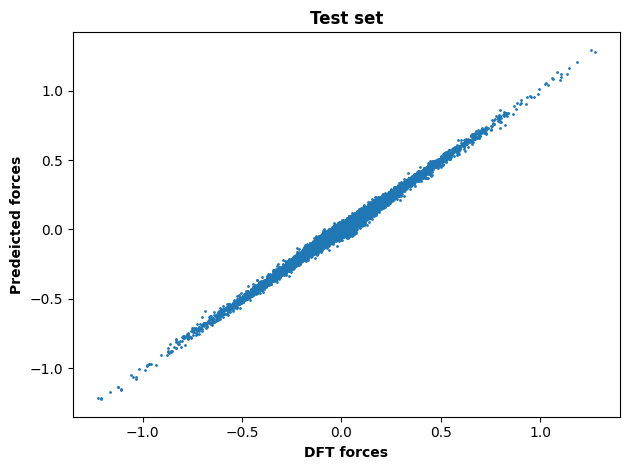

In [ ]:
plot(model, X_test, n_test, X_train, n_train, y_train, y_test, 'r2_loss')

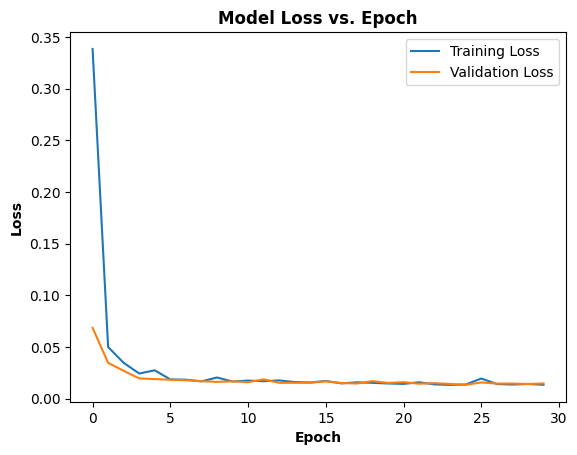

In [ ]:
import matplotlib.pyplot as plt

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss vs. Epoch', fontweight= 'bold')
plt.xlabel('Epoch', fontweight= 'bold')
plt.ylabel('Loss', fontweight= 'bold')
plt.legend()
plt.savefig("loss-epoch-r2_loss.png")
plt.show()

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 5,
    verbose=1,
    restore_best_weights=True
)

P_DROPOUT = 0.0
L2 = 0.00
sigma = 0.05

input_x = Input(shape=(120, 2))
input_n = Input(shape=(120, 3))

x_shortcut = input_x

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='relu')(input_x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2))(x)

x_shortcut = Conv1D(filters = 128, kernel_size = 1,
                kernel_regularizer = regularizers.l2(L2))(x_shortcut)
x = Concatenate(axis = -1)([x, x_shortcut])
x = Activation('relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=64, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=32, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='relu')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=1, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='linear')(x)
x = Dropout(P_DROPOUT)(x)

x = Multiply()([x, input_n])

force = pairwise_pool(x)

model = Model(inputs=[input_x, input_n], outputs=force)


model.compile(optimizer='Adam', loss='mse', metrics=['mse', rmse, 'mae'])
his = model.fit([X_train, n_train], y_train, epochs=50, batch_size=2000,
                validation_data=([X_test, n_test], y_test), verbose=1, callbacks= [early_stopping])

Epoch 1/50
90/90 [==============================] - 12s 97ms/step - loss: 0.0066 - mse: 0.0066 - rmse: 0.0787 - mae: 0.0504 - val_loss: 0.0028 - val_mse: 0.0028 - val_rmse: 0.0525 - val_mae: 0.0359
Epoch 2/50
90/90 [==============================] - 8s 92ms/step - loss: 0.0015 - mse: 0.0015 - rmse: 0.0373 - mae: 0.0253 - val_loss: 6.5032e-04 - val_mse: 6.5032e-04 - val_rmse: 0.0254 - val_mae: 0.0186
Epoch 3/50
90/90 [==============================] - 8s 88ms/step - loss: 4.5690e-04 - mse: 4.5690e-04 - rmse: 0.0211 - mae: 0.0153 - val_loss: 3.0984e-04 - val_mse: 3.0984e-04 - val_rmse: 0.0176 - val_mae: 0.0135
Epoch 4/50
90/90 [==============================] - 8s 94ms/step - loss: 3.2043e-04 - mse: 3.2043e-04 - rmse: 0.0178 - mae: 0.0134 - val_loss: 2.6672e-04 - val_mse: 2.6672e-04 - val_rmse: 0.0163 - val_mae: 0.0126
Epoch 5/50
90/90 [==============================] - 8s 88ms/step - loss: 2.8678e-04 - mse: 2.8678e-04 - rmse: 0.0168 - mae: 0.0128 - val_loss: 3.6449e-04 - val_mse: 3.6449

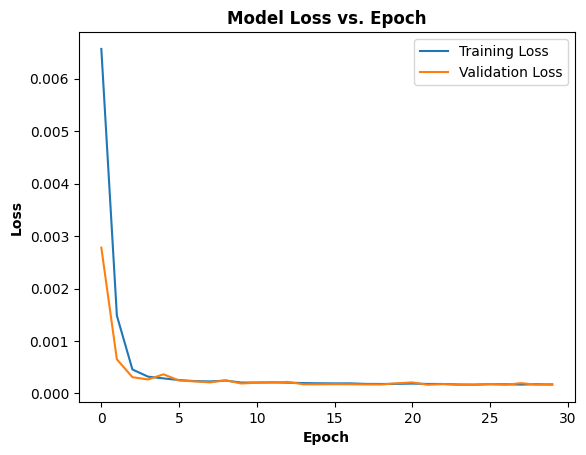

In [ ]:
# plot train-val loss / epoch
# build own model
import matplotlib.pyplot as plt

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss vs. Epoch', fontweight= 'bold')
plt.xlabel('Epoch', fontweight= 'bold')
plt.ylabel('Loss', fontweight= 'bold')
plt.legend()
plt.savefig("loss-epoch-relu.png")
plt.show()

1404/1404 [==============================] - 3s 2ms/step


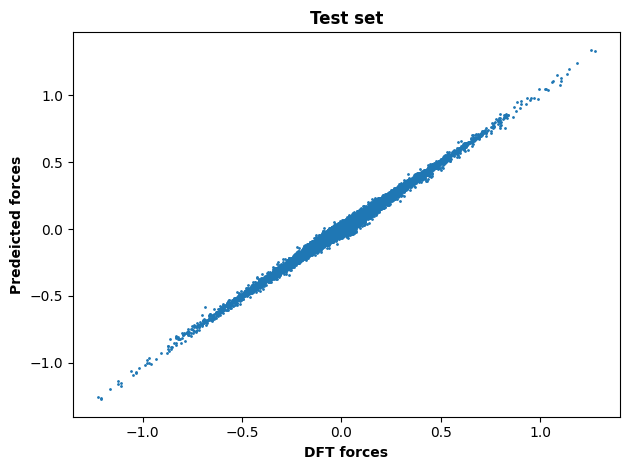

In [ ]:
plot(model, X_test, n_test, X_train, n_train, y_train, y_test, 'relu')

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 5,
    verbose=1,
    restore_best_weights=True
)

P_DROPOUT = 0.0
L2 = 0.00
sigma = 0.05

input_x = Input(shape=(120, 2))
input_n = Input(shape=(120, 3))

x_shortcut = input_x

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='tanh')(input_x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='tanh')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2))(x)

x_shortcut = Conv1D(filters = 128, kernel_size = 1,
                kernel_regularizer = regularizers.l2(L2))(x_shortcut)
x = Concatenate(axis = -1)([x, x_shortcut])
x = Activation('tanh')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=64, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='tanh')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=32, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='tanh')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=1, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='linear')(x)
x = Dropout(P_DROPOUT)(x)

x = Multiply()([x, input_n])

force = pairwise_pool(x)

model = Model(inputs=[input_x, input_n], outputs=force)


model.compile(optimizer='Adam', loss='mse', metrics=['mse', rmse, 'mae'])
his = model.fit([X_train, n_train], y_train, epochs=50, batch_size=2000,
                validation_data=([X_test, n_test], y_test), verbose=1, callbacks= [early_stopping])

Epoch 1/50
90/90 [==============================] - 12s 98ms/step - loss: 0.0102 - mse: 0.0102 - rmse: 0.0954 - mae: 0.0661 - val_loss: 0.0053 - val_mse: 0.0053 - val_rmse: 0.0727 - val_mae: 0.0500
Epoch 2/50
90/90 [==============================] - 8s 94ms/step - loss: 0.0047 - mse: 0.0047 - rmse: 0.0686 - mae: 0.0466 - val_loss: 0.0037 - val_mse: 0.0037 - val_rmse: 0.0605 - val_mae: 0.0420
Epoch 3/50
90/90 [==============================] - 8s 88ms/step - loss: 0.0017 - mse: 0.0017 - rmse: 0.0390 - mae: 0.0283 - val_loss: 7.2932e-04 - val_mse: 7.2932e-04 - val_rmse: 0.0270 - val_mae: 0.0209
Epoch 4/50
90/90 [==============================] - 8s 93ms/step - loss: 7.3650e-04 - mse: 7.3650e-04 - rmse: 0.0271 - mae: 0.0207 - val_loss: 6.2050e-04 - val_mse: 6.2050e-04 - val_rmse: 0.0249 - val_mae: 0.0194
Epoch 5/50
90/90 [==============================] - 8s 95ms/step - loss: 6.4083e-04 - mse: 6.4083e-04 - rmse: 0.0252 - mae: 0.0195 - val_loss: 5.3423e-04 - val_mse: 5.3423e-04 - val_rmse:

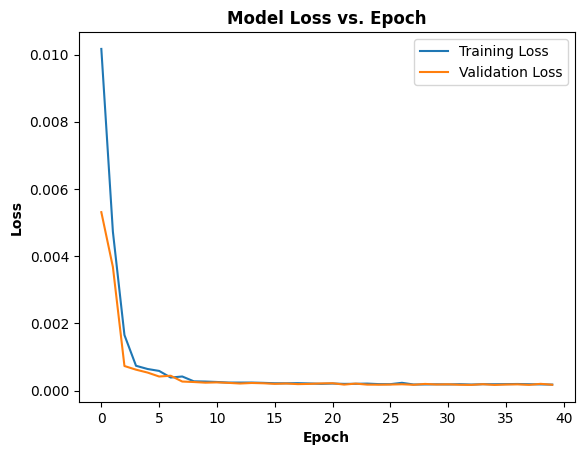

In [ ]:
import matplotlib.pyplot as plt

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss vs. Epoch', fontweight= 'bold')
plt.xlabel('Epoch', fontweight= 'bold')
plt.ylabel('Loss', fontweight= 'bold')
plt.legend()
plt.savefig("loss-epoch-tanh.png")
plt.show()

1404/1404 [==============================] - 4s 2ms/step


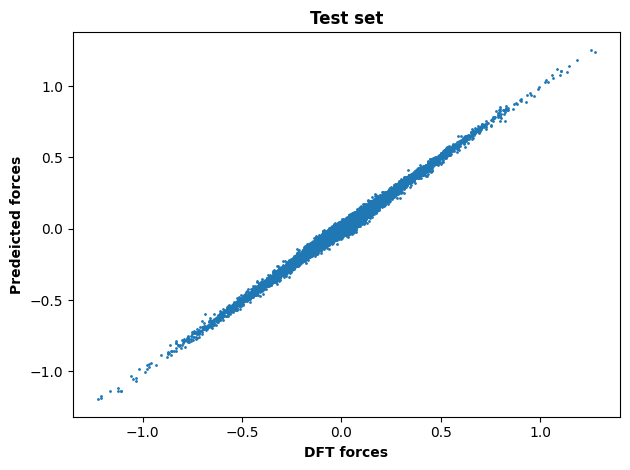

In [ ]:
plot(model, X_test, n_test, X_train, n_train, y_train, y_test, "tanh")

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience= 5,
    verbose=1,
    restore_best_weights=True
)

P_DROPOUT = 0.0
L2 = 0.00
sigma = 0.05

input_x = Input(shape=(120, 2))
input_n = Input(shape=(120, 3))

x_shortcut = input_x

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='sigmoid')(input_x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='sigmoid')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=128, kernel_size=1, kernel_regularizer=regularizers.l2(L2))(x)

x_shortcut = Conv1D(filters = 128, kernel_size = 1,
                kernel_regularizer = regularizers.l2(L2))(x_shortcut)
x = Concatenate(axis = -1)([x, x_shortcut])
x = Activation('sigmoid')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=64, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='sigmoid')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=32, kernel_size=1, kernel_regularizer = regularizers.l2(L2),
        activation='sigmoid')(x)
x = Dropout(P_DROPOUT)(x)

x = Conv1D(filters=1, kernel_size=1, kernel_regularizer=regularizers.l2(L2),
        activation='linear')(x)
x = Dropout(P_DROPOUT)(x)

x = Multiply()([x, input_n])

force = pairwise_pool(x)

model = Model(inputs=[input_x, input_n], outputs=force)


model.compile(optimizer='Adam', loss='mse', metrics=['mse',rmse, 'mae'])
his = model.fit([X_train, n_train], y_train, epochs=200, batch_size=2000,
                validation_data=([X_test, n_test], y_test), verbose=1, callbacks= [early_stopping])

Epoch 1/200
90/90 [==============================] - 11s 95ms/step - loss: 0.1299 - mse: 0.1299 - rmse: 0.2411 - mae: 0.1841 - val_loss: 0.0126 - val_mse: 0.0126 - val_rmse: 0.1120 - val_mae: 0.0742
Epoch 2/200
90/90 [==============================] - 9s 95ms/step - loss: 0.0130 - mse: 0.0130 - rmse: 0.1139 - mae: 0.0752 - val_loss: 0.0126 - val_mse: 0.0126 - val_rmse: 0.1119 - val_mae: 0.0741
Epoch 3/200
90/90 [==============================] - 9s 95ms/step - loss: 0.0130 - mse: 0.0130 - rmse: 0.1138 - mae: 0.0750 - val_loss: 0.0126 - val_mse: 0.0126 - val_rmse: 0.1118 - val_mae: 0.0740
Epoch 4/200
90/90 [==============================] - 8s 90ms/step - loss: 0.0129 - mse: 0.0129 - rmse: 0.1136 - mae: 0.0749 - val_loss: 0.0125 - val_mse: 0.0125 - val_rmse: 0.1117 - val_mae: 0.0738
Epoch 5/200
90/90 [==============================] - 8s 92ms/step - loss: 0.0129 - mse: 0.0129 - rmse: 0.1135 - mae: 0.0748 - val_loss: 0.0125 - val_mse: 0.0125 - val_rmse: 0.1115 - val_mae: 0.0737
Epoch 6/2

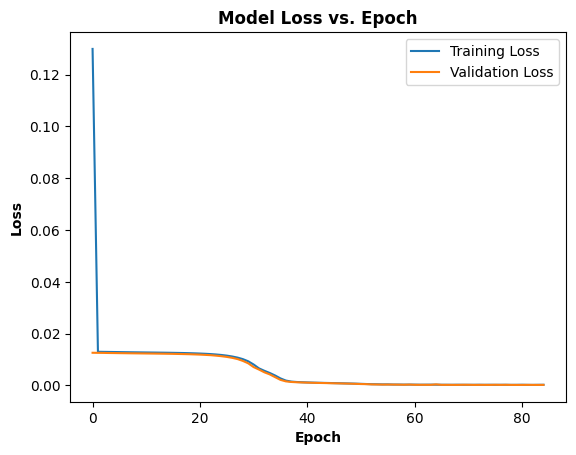

In [ ]:
import matplotlib.pyplot as plt

loss = his.history['loss']
val_loss = his.history['val_loss']

plt.figure()
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss vs. Epoch', fontweight= 'bold')
plt.xlabel('Epoch', fontweight= 'bold')
plt.ylabel('Loss', fontweight= 'bold')
plt.legend()
plt.savefig("loss-epoch-sigmoid.png")
plt.show()

1404/1404 [==============================] - 4s 3ms/step


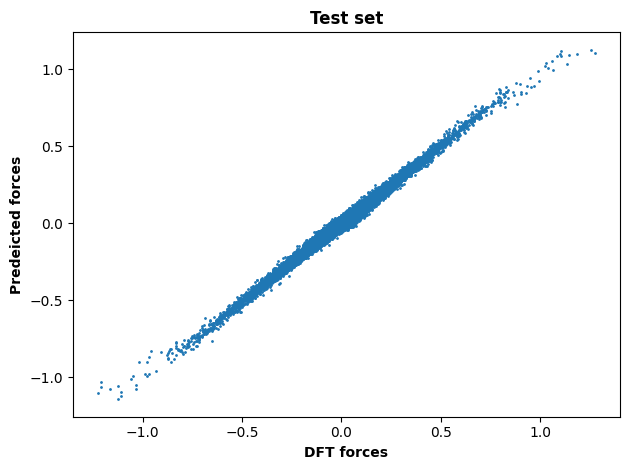

In [ ]:
plot(model, X_test, n_test, X_train, n_train, y_train, y_test, "sigmoid")
